<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 177.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 156.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 158.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 156.1 MB/s eta 0:00:00


## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [5]:
# Write your code here
df.info()
summary = pd.DataFrame({
    "Data_Type": df.dtypes,
    "Non_Null_Count": df.notna().sum(),
    "Missing_Count": df.isna().sum(),
    "Missing_Percent": (df.isna().mean() * 100).round(2)
})
with pd.option_context("display.max_rows", None):
    print(summary)
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
                               Data_Type  Non_Null_Count  Missing_Count  \
ResponseId                         int64           65437              0   
MainBranch                        object           65437              0   
Age                               object           65437              0   
Employment                        object           65437              0   
RemoteWork                        object           54806          10631   
Check                             object           65437              0   
CodingActivities                  object           54466          10971   
EdLevel                           object           60784           4653   
LearnCode                         object           60488           4949   
LearnCodeOnline                   object           49237         

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [6]:
# Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


Original unique: 185
Normalized unique: 185
RemoteWork Original unique: 3
RemoteWork Normalized unique: 3


<Axes: xlabel='RemoteWork'>

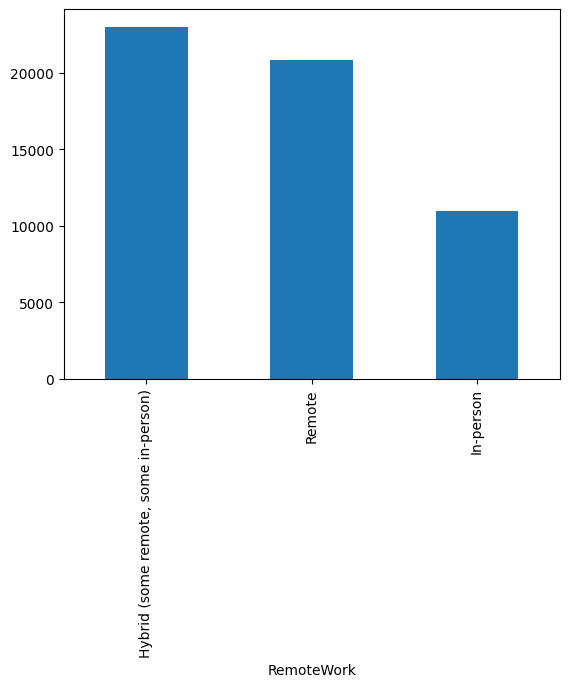

In [44]:
# Write your code here
irrelevant = ["n/a", "na", "unknown", "prefer not to say", "none", ""]
df["Country_Normalized"] = (
    df["Country"]
    .astype("string")
    .str.strip()          # remove leading/trailing spaces
    .str.replace(r"\s+", " ", regex=True)  # collapse multiple spaces
)
df["Country_Normalized"] = df["Country_Normalized"].str.lower()
df.loc[df["Country_Normalized"].isin(irrelevant), "Country_Normalized"] = pd.NA
print("Original unique:", df["Country"].nunique(dropna=True))
print("Normalized unique:", df["Country_Normalized"].nunique(dropna=True))

df["RemoteWork_Normalized"] = (
    df["RemoteWork"]
    .astype("string")
    .str.strip()          # remove leading/trailing spaces
    .str.replace(r"\s+", " ", regex=True)  # collapse multiple spaces
)
df["RemoteWork_Normalized"] = df["RemoteWork_Normalized"].str.lower()
df.loc[df["RemoteWork_Normalized"].isin(irrelevant), "RemoteWork_Normalized"] = pd.NA
print("RemoteWork Original unique:", df["RemoteWork"].nunique(dropna=True))
print("RemoteWork Normalized unique:", df["RemoteWork_Normalized"].nunique(dropna=True))

df["RemoteWork"].value_counts().plot(kind="bar")


<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [16]:
## Write your code here
# 1) Normalize into a consistent key for matching
country_key = (
    df["Country"]
    .astype("string")
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.lower()
)

# 2) Map known variants to a consistent format
country_map = {
    "usa": "United States of America",
    "u.s.a.": "United States of America",
    "us": "United States of America",
    "u.s.": "United States of America",
    "united states": "United States of America",
    "uk": "United Kingdom",
    "u.k.": "United Kingdom",
    "england": "United Kingdom",
    "russia": "Russian Federation",
    "korea, south": "South Korea",
    "south korea": "South Korea",
    "korea republic of": "South Korea",
}

df["Country_Standardized"] = country_key.replace(country_map)

# Optional: make it look nice (Title Case) after mapping
df["Country_Standardized"] = df["Country_Standardized"].str.title()
print("Original unique:", df["Country"].nunique(dropna=True))
print("Standardized unique:", df["Country_Standardized"].nunique(dropna=True))

##EdLevel Normalization

ed_key = (
    df["EdLevel"]
    .astype("string")
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)

ed_map = {
    "Primary/elementary school": "Primary/Elementary",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "High school",
    "Some college/university study without earning a degree": "Some college",
    "Associate degree (A.A., A.S., etc.)": "Associate",
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor’s",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master’s",
    "Professional degree (JD, MD, etc.)": "Professional degree",
    "Other doctoral degree (Ph.D., Ed.D., etc.)": "Doctorate",
}

df["EdLevel_Standardized"] = ed_key.replace(ed_map)
print(df["EdLevel"])
print(df["EdLevel_Standardized"])

Original unique: 185
Standardized unique: 185
0                                Primary/elementary school
1             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
2          Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
3        Some college/university study without earning ...
4        Secondary school (e.g. American high school, G...
                               ...                        
65432         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
65433                                                  NaN
65434         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
65435    Secondary school (e.g. American high school, G...
65436                                                  NaN
Name: EdLevel, Length: 65437, dtype: object
0        Primary/Elementary
1                Bachelor’s
2                  Master’s
3              Some college
4               High school
                ...        
65432            Bachelor’s
65433                  <NA>
65434            Bachelor’s
65435    

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [19]:
## Write your code here
top5_emp = df["Employment"].value_counts().head(5).index

df["Employment_Top5"] = df["Employment"].where(
    df["Employment"].isin(top5_emp),
    other="Other"
)

employment_dummies = pd.get_dummies(
    df["Employment_Top5"],
    prefix="Employment"
)

df_encoded = pd.concat([df, employment_dummies], axis=1)
print(df_encoded)
print(employment_dummies.sum().sort_values(ascending=False))
print(df["Employment_Top5"].value_counts(dropna=False))

Employment_Employed, full-time                                                         39041
Employment_Other                                                                       10943
Employment_Independent contractor, freelancer, or self-employed                         4846
Employment_Student, full-time                                                           4709
Employment_Employed, full-time;Independent contractor, freelancer, or self-employed     3557
Employment_Not employed, but looking for work                                           2341
dtype: int64
Employment_Top5
Employed, full-time                                                         39041
Other                                                                       10943
Independent contractor, freelancer, or self-employed                         4846
Student, full-time                                                           4709
Employed, full-time;Independent contractor, freelancer, or self-employed     3557
Not

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [28]:
## Write your code here
missing_counts = df.isna().sum()
missing_counts_sorted = missing_counts.sort_values(ascending=False)
with pd.option_context("display.max_rows", None):
    print(missing_counts_sorted[missing_counts_sorted > 0].head(5))

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [30]:
## Write your code here
num_cols = df.select_dtypes(include="number").columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [34]:
## Write your code here
cat_cols = df.select_dtypes(include=["object", "string"]).columns
cat_cols
for col in cat_cols:
    if df[col].isna().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [35]:
## Write your code here
comp_col = "ConvertedCompYearly_Imputed" \
    if "ConvertedCompYearly_Imputed" in df.columns \
    else "ConvertedCompYearly"
min_val = df[comp_col].min()
max_val = df[comp_col].max()

df["ConvertedCompYearly_MinMax"] = (
    (df[comp_col] - min_val) / (max_val - min_val)
)

df["ConvertedCompYearly_MinMax"].describe()

count    65437.000000
mean         0.004464
std          0.006903
min          0.000000
25%          0.003998
50%          0.003998
75%          0.003998
max          1.000000
Name: ConvertedCompYearly_MinMax, dtype: float64

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [37]:
## Write your code here
df["ConvertedCompYearly_Log"] = np.log1p(df[comp_col])
df[[comp_col, "ConvertedCompYearly_Log"]].describe()

,ConvertedCompYearly,ConvertedCompYearly_Log
count,2.343500e+04,23435.000000
mean,8.615529e+04,10.785883
std,1.867570e+05,1.402871
min,1.000000e+00,0.693147
25%,3.271200e+04,10.395528
50%,6.500000e+04,11.082158
75%,1.079715e+05,11.589632
max,1.625660e+07,16.604010


### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [43]:
## Write your code here
years_numeric = (
    df["YearsCodePro"]
    .replace({
        "Less than 1 year": 0.5,
        "More than 50 years": 50
    })
)

years_numeric = pd.to_numeric(years_numeric, errors="coerce")

df["ExperienceLevel"] = pd.cut(
    years_numeric,
    bins=[-1, 1, 5, 10, 20, np.inf],
    labels=[
        "Entry",
        "Junior",
        "Mid",
        "Senior",
        "Expert"
    ]
)

print(df[["YearsCodePro", "ExperienceLevel"]].head(10))
print(df["ExperienceLevel"].value_counts(dropna=False))

  YearsCodePro ExperienceLevel
0          NaN             NaN
1           17          Senior
2           27          Expert
3          NaN             NaN
4          NaN             NaN
5          NaN             NaN
6            7             Mid
7          NaN             NaN
8          NaN             NaN
9           11          Senior
ExperienceLevel
Junior    15002
NaN       13827
Mid       12653
Senior    11625
Expert     6835
Entry      5495
Name: count, dtype: int64


### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
